## Assignment 2 Data Analysis using Pandas

This assignment will contain 2 question with details as below. The due date is October 23 (Sunday), 2022 23:59PM. Each late day will result in 20% loss of total points.

### Question 1 (20 points) Datacamp courses

Datacamp is the online learning platform for data science courses and modules. As the only collaborator in Portugal, this course provides free access to the students in Business Analytics as the complementary resource. For this assignment, you are expected to complete the following moduels and submit your completion badges:

- [Importing & Cleaning Data with Python](https://app.datacamp.com/learn/skill-tracks/importing-cleaning-data-with-python)
- [Data Manipulation with Python](https://app.datacamp.com/learn/skill-tracks/data-manipulation-with-python)

Each badge will account for 10 points. If you are confident with the knowledge, you may skip the videos and directly finish the challenges. You can submit the badge by the end of the October if you would need more time. 

### Question 2 (80 points) Celluloid ceiling

Wonder Woman             |  Captain Marvel
:-------------------------:|:-------------------------:
![wonderwoman](https://upload.wikimedia.org/wikipedia/en/4/4f/Wonder_Woman_1984_poster.png) | ![marvel](https://upload.wikimedia.org/wikipedia/pt/5/59/Captain_Marvel_%282018%29.jpg)

Women are involved in the film industry in all roles, including as film directors, actresses, cinematographers, film producers, film critics, and other film industry professions, though women have been underrepresented in all these positions. Studies found that women have always had a presence in film acting, but have consistently been underrepresented, and on average significantly less well paid. 

In 2015, Forbes reported that "...just 21 of the 100 top-grossing films of 2014 featured a female lead or co-lead, while only 28.1% of characters in 100 top-grossing films were female... This means it’s much rarer for women to get the sort of blockbuster role which would warrant the massive backend deals many male counterparts demand (Tom Cruise in Mission: Impossible or Robert Downey Jr. in Iron Man, for example)".

Also, Forbes' analysis of US acting salaries in 2013 determined that the "...men on Forbes’ list of top-paid actors for that year made 2½ times as much money as the top-paid actresses. That means that Hollywood's best-compensated actresses made just 40 cents for every dollar that the best-compensated men made. 


In this assignment, we want to examine whether and how women representation is lacking in the film industry. We will adopt The Bechdel test as a measure of the representation of women in the film industry. The test is named after the American cartoonist Alison Bechdel in whose 1985 comic strip Dykes to Watch Out For the test first appeared. **A movie is said to meet the Bechdel test  following three criteria: (1) it has to have at least two women in it, who (2) who talk to each other, about (3) something besides a man.**

We are going to obtain the data ourselves to perform the analysis. Specifically, we will retrieve the movie metadata from IMDB (Internet Movie Database), an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. As of January 2020, IMDb has approximately 6.5 million titles (including episodes) and 10.4 million personalities in its database, as well as 83 million registered users.


The IMDb Top 250 is a list of the top rated 250 films, based on ratings by the registered users of the website using the methods described. We will focus on these famous movies in this analysis:

**Question 2.1** (25 points): We will retrieve the metadata of IMDb Top 250 movies from the [IMDb charts](https://www.imdb.com/chart/top/). For each movie on the list, we can scrape the following characteristics from the information page. For example, from the [page of top rated movie "The Shawshank Redemption"](https://www.imdb.com/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=F4QFC0SVZN1HTDHCY3C0&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_1), we want to extract the metadata about this movie as:
- IMDb id (0111161)
- Movie name (The Shawshank Redemption)
- Year (1994)
- Director (Frank Darabont)
- Stars (Tim Robbins, Morgan Freeman, Bob Gunton)
- Rating (9.3)
- Number of reviews (2.6M)
- Genres (Drama)
- Country (USA)
- Language (English)
- Budget (\$25,000,000)
- Gross box Office Revenue (\$28,884,504)

![imdb](https://mrfloris.com/files/images/imdb-top250-page-start.png)


After scraping the 250 movies, save the data as a dataframe ```imdb_top_movies```. 

Also, saving the dataframe to a local file ```imdb_top_movies.csv``` so that later you can load it without scraping the website twice.

Hint: You can get the links to these movies from the IMDb top chart page, and then scrape each movie page by sending the request to these links. At each movie page, the information requested are located at different sections. 

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [ ]:
# call the request with get method
url = "https://www.imdb.com/chart/top/"
headers = {"Accept-Language": "en-US,en;q=0.5"}

page = requests.get(url, headers=headers)

soup = BeautifulSoup(page.content, 'html.parser')

# create an empty dictionary to save the data in, before transforming into pandas df later
topMoviesDict = {}
baseUrl = "https://www.imdb.com"

movies = soup.find_all(class_="titleColumn")

# From the top 250 movies page, scrap already the available data and save it to the dict
# in the next step, access each movie page with the link to get the remaining data
for movie in movies:
    rank = int(movie.get_text(strip=True).split(".")[0])

    href = movie.find('a').get("href")
    id = href.split("/")[2].replace("tt", "")

    movieName = movie.a.text
    year = movie.span.text.strip("()")
    director = movie.a.get("title").split(" (dir.)")[0]

    link = baseUrl + href

    # add the data to the dictionary
    data = { "Id": id, "Movie name": movieName, 'Year': year, 'Director': director, 'Link': link }
    topMoviesDict[rank] = data


In [ ]:
# Access each movie subpage and get the data from there
# Then, update the dictionary 

for key in topMoviesDict.keys():
    try: 
        # request content from each subpage with the link scraped earlier
        mUrl = topMoviesDict[key]["Link"]
        mPage = requests.get(mUrl, headers=headers)
        mSoup = BeautifulSoup(mPage.content, 'html.parser')

        # get the data
        stars = [star.text.replace("(voice)", "") for star in mSoup.find_all('li', attrs={"data-testid":"title-pc-principal-credit"})[2].ul]
        rating = mSoup.find(class_="sc-7ab21ed2-1 jGRxWM").text
        reviews = mSoup.find(class_="sc-7ab21ed2-3 dPVcnq").text
        genres = [genre.text for genre in mSoup.find(class_="ipc-chip-list__scroller").find_all(class_="ipc-chip__text")]
        country = mSoup.find_all('li', attrs={"data-testid":"title-details-origin"})[0].li.text
        language = mSoup.find('li', attrs={'data-testid':"title-details-languages"}).a.text
        runtime = mSoup.find("li", attrs = {"data-testid":"title-techspec_runtime"}).find("div").text

        # noticed that these 2 attributes were not present on all websites, therefore put np.nan if not present
        boxOffice = mSoup.find('li', attrs ={'data-testid':'title-boxoffice-cumulativeworldwidegross'}).div.text if mSoup.find('li', attrs ={'data-testid':'title-boxoffice-cumulativeworldwidegross'}) else np.nan      
        budget = mSoup.find('li', attrs ={'data-testid':"title-boxoffice-budget"}).div.text.strip(" (estimated)") if mSoup.find('li', attrs ={'data-testid':"title-boxoffice-budget"}) else np.nan

        # update the dictionary with the scraped values
        upd_data = {"Stars": stars, 'Rating': rating, 'Number of reviews': reviews, 'Genres': genres, 'Country': country, 'Language':language, 'Budget':budget, 'Gross box office revenue':boxOffice, "Runtime":runtime}   
        topMoviesDict[key].update(upd_data)
    except Exception as e:
        print("error at", key, ":", e)


Comment: decided to keep the movies even if they didn't have budget and box office revenue, because they can still be used for other data analysis; drop them later for that exercise. Also decided to only scrape one language, since that is the main language (and in the instructions it was given not as plural).

In [ ]:
# transform the dictionary into a pandas dataframe
imdb_top_movies = pd.DataFrame.from_dict(topMoviesDict, orient = 'index')

# save as csv file
filename = "imdb_top_movies.csv"
imdb_top_movies.to_csv(filename)

In [2]:
# read the csv file created via webscraping
# apply converter so leading zeros of id are kept 
filename = "imdb_top_movies.csv"
imdb_top_movies = pd.read_csv(filename, index_col = 0, converters={'Id': str})

In [3]:
imdb_top_movies = imdb_top_movies.astype({'Id':"string", "Movie name": 'string', 'Year': 'int64', 'Director': 'string', "Stars": 'string', 'Rating': 'float64', 'Number of reviews': 'string', 'Genres': 'string', 'Country': 'string', 'Language': 'string', 'Budget': 'string', 'Gross box office revenue': 'string', 'Runtime': 'string' })
imdb_top_movies.head()

,Id,Movie name,Year,Director,Link,Stars,Rating,Number of reviews,Genres,Country,Language,Budget,Gross box office revenue,Runtime
1,0111161,The Shawshank Redemption,1994,Frank Darabont,https://www.imdb.com/title/tt0111161/,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']",9.3,2.6M,['Drama'],United States,English,"$25,000,000","$28,884,504",2 hours 22 minutes
2,0068646,The Godfather,1972,Francis Ford Coppola,https://www.imdb.com/title/tt0068646/,"['Marlon Brando', 'Al Pacino', 'James Caan']",9.2,1.8M,"['Crime', 'Drama']",United States,English,"$6,000,000","$250,341,816",2 hours 55 minutes
3,0468569,The Dark Knight,2008,Christopher Nolan,https://www.imdb.com/title/tt0468569/,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",9.0,2.6M,"['Action', 'Crime', 'Drama']",United States,English,"$185,000,000","$1,006,234,167",2 hours 32 minutes
4,0071562,The Godfather Part II,1974,Francis Ford Coppola,https://www.imdb.com/title/tt0071562/,"['Al Pacino', 'Robert De Niro', 'Robert Duvall']",9.0,1.3M,"['Crime', 'Drama']",United States,English,"$13,000,000","$47,961,919",3 hours 22 minutes
5,0050083,12 Angry Men,1957,Sidney Lumet,https://www.imdb.com/title/tt0050083/,"['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam']",9.0,782K,"['Crime', 'Drama']",United States,English,"$350,000",$955,1 hour 36 minutes


In [4]:
# start with data cleaning

def getMinutes(runtime):
    """This function transforms the string input of the runtime and returns only the number of minutes"""
    hh = mm = 0
    for word in runtime.split():
        word = word.lower()
        if word.isdigit():
            save = word
        elif word.startswith('hour'):
            hh = int(save)
        elif word.startswith('minute'):
            mm = int(save)
    return (hh*60)+mm

# to treat the lists in stars and genres
imdb_top_movies["Stars"] = imdb_top_movies["Stars"].apply(eval)
imdb_top_movies["Genres"] = imdb_top_movies["Genres"].apply(eval)

# get the number of minutes out of the string in runtime column
imdb_top_movies["Runtime Minutes"] = imdb_top_movies["Runtime"].apply(getMinutes)

imdb_top_movies.head()

,Id,Movie name,Year,Director,Link,Stars,Rating,Number of reviews,Genres,Country,Language,Budget,Gross box office revenue,Runtime,Runtime Minutes
1,0111161,The Shawshank Redemption,1994,Frank Darabont,https://www.imdb.com/title/tt0111161/,"[Tim Robbins, Morgan Freeman, Bob Gunton]",9.3,2.6M,[Drama],United States,English,"$25,000,000","$28,884,504",2 hours 22 minutes,142
2,0068646,The Godfather,1972,Francis Ford Coppola,https://www.imdb.com/title/tt0068646/,"[Marlon Brando, Al Pacino, James Caan]",9.2,1.8M,"[Crime, Drama]",United States,English,"$6,000,000","$250,341,816",2 hours 55 minutes,175
3,0468569,The Dark Knight,2008,Christopher Nolan,https://www.imdb.com/title/tt0468569/,"[Christian Bale, Heath Ledger, Aaron Eckhart]",9.0,2.6M,"[Action, Crime, Drama]",United States,English,"$185,000,000","$1,006,234,167",2 hours 32 minutes,152
4,0071562,The Godfather Part II,1974,Francis Ford Coppola,https://www.imdb.com/title/tt0071562/,"[Al Pacino, Robert De Niro, Robert Duvall]",9.0,1.3M,"[Crime, Drama]",United States,English,"$13,000,000","$47,961,919",3 hours 22 minutes,202
5,0050083,12 Angry Men,1957,Sidney Lumet,https://www.imdb.com/title/tt0050083/,"[Henry Fonda, Lee J. Cobb, Martin Balsam]",9.0,782K,"[Crime, Drama]",United States,English,"$350,000",$955,1 hour 36 minutes,96


**Question 2.2** (5 points) If you group the movies by release years, show the number of movies at each decade in descending order.

In [5]:
imdb_top_movies["Decade"] = (10 * (imdb_top_movies['Year'] // 10)).astype(str) + 's'

print("The number of movies released per decade:")
imdb_top_movies.groupby("Decade")["Movie name"].count().sort_values(ascending=False)


The number of movies released per decade:


Decade
2000s    48
2010s    43
1990s    41
1980s    27
1950s    23
1970s    19
1960s    18
1940s    12
1930s     7
1920s     6
2020s     6
Name: Movie name, dtype: int64

Remark: I understood that by saying "if you group the movies by release years", you meant also grouping them by decade, because the result you get from grouping by decade, then each year, and then sort descending ( imdb_top_movies.groupby(["Decade", "Year"])["Movie name"].count().sort_values(ascending=False) ), doesn't convey as much information as the dataframe above, and didn't make as much sense to me

**Quesion 2.3** (5 points) Show the number of movies by the distribution of runtime at quartile (0-25%, 25-50%, 50-75%, 75-100%).

In [50]:
# qcut = split sorted data into four parts, each with an EQUAL number of observations (in each bin, will have the same number of records)
# so for example quartile1, the 25% quartile means that 25% of the data falls below the first quartile

print("The number of movies by distribution of runtime at quartiles:")
labels = ["0-25%", "25-50%", "50-75%", "75-100%"]
imdb_top_movies["Quartile"] = pd.qcut(imdb_top_movies["Runtime Minutes"], 4, labels = labels)
print(imdb_top_movies['Quartile'].value_counts(sort=False))

print("\n"+"Note: the whole point of quartiles is to split up the data into four bins, each bin containing an equal number of observations. That's why each quartile contains almost the same amount of movies")

The number of movies by distribution of runtime at quartiles:
0-25%      63
25-50%     62
50-75%     63
75-100%    62
Name: Quartile, dtype: int64

Note: the whole point of quartiles is to split up the data into four bins, each bin containing an equal number of observations. That's why each quartile contains almost the same amount of movies


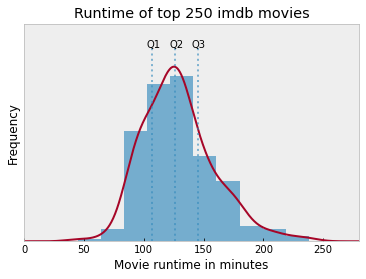

[ 45.   107.25 126.5  145.   238.  ]
0-25% of movies: 45.0 - 107.25 minutes
25-50% of movies: 107.25 - 126.5 minutes
50-75% of movies: 126.5 - 145.0 minutes
75-100% of movies: 145.0 - 238.0 minutes


In [61]:
import matplotlib.pyplot as plt

runtime = imdb_top_movies['Runtime Minutes']
fig, ax = plt.subplots(figsize = (6,4))

runtime.plot(kind = "hist",  density = True, bins = 10, alpha = 0.65)
runtime.plot(kind = "kde")
ax.set_title("Runtime of top 250 imdb movies")

# x
ax.set_xlabel("Movie runtime in minutes")
ax.set_xlim(0, 280)

# y
ax.set_yticks([])
ax.set_ylim(0, 0.018)

ax.set_ylabel("Frequency")

# Calculate percentiles
quant_25, quant_50, quant_75 = runtime.quantile(0.25), runtime.quantile(0.5), runtime.quantile(0.75)
quants = [quant_25, quant_50, quant_75]

# Plot the lines with a loop
for i in quants:
    ax.axvline(i, alpha = 0.6, ymax = 0.9, linestyle = ":")

# annotations
ax.text(x= quant_25-5, y=0.016, s="Q1")
ax.text(x= quant_50-5, y=0.016, s="Q2")
ax.text(x= quant_75-5, y=0.016, s="Q3")

# other visual improvements
plt.style.use("bmh")
ax.grid(False)
plt.show()

# values of quantiles
x = np.quantile(imdb_top_movies['Runtime Minutes'], [0,0.25,0.5,0.75,1])
print(x)

print("0-25% of movies:", x[0], "-", quant_25, "minutes")
print("25-50% of movies:", quant_25, "-", quant_50, "minutes")
print("50-75% of movies:", quant_50, "-", quant_75, "minutes")
print("75-100% of movies:", quant_75, "-", x[-1], "minutes")


**Question 2.4** (5 points) Show the top 10 most popular actor/actresses in terms of number of movies they have starred. 

In [62]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

print("Top 10 most popular actor/actresses by number of movies:")
to_1D(imdb_top_movies["Stars"]).value_counts().nlargest(10)


Top 10 most popular actor/actresses by number of movies:


Robert De Niro       9
Leonardo DiCaprio    6
Tom Hanks            6
Harrison Ford        6
Christian Bale       5
Clint Eastwood       5
Charles Chaplin      5
Brad Pitt            4
James Stewart        4
Jack Nicholson       4
dtype: int64

**Question 2.5** (5 points) Show the average ratings of movies across the genres and decades.

In [74]:
# The following code was used to enable calculating the average ratings across the genres and decades
# With explode: For each movie, created new rows for each genre recorded

df_genres = imdb_top_movies.explode("Genres")
print("Average rating of movies across the genres and decades:")
df_genres.groupby(["Genres", "Decade"])["Rating"].mean().round(2)

Average rating of movies across the genres and decades:


Genres   Decade
Action   1920s     8.20
         1950s     8.45
         1960s     8.40
         1970s     8.60
         1980s     8.29
                   ... 
War      2010s     8.20
Western  1940s     8.20
         1960s     8.50
         1990s     8.20
         2010s     8.40
Name: Rating, Length: 150, dtype: float64

**Remarks:**
For many movies, multiple genres are recorded.
Assumption: The order in which the genres were put into imdb didn't matter, one genre wasn't represented more in the movie than another

I understood the question in a way, that you wanted to see the average for each genre, by each decade
But in case you wanted to see the average rating respectively by genre and by decade, I'm of course able to calculate that:

df_genres.groupby("genre")["rating"].mean().round(2)


imdb_top_movies.groupby("Decade")["Rating"].mean().round(2)

**Question 2.6** (10 points) Now let's retrieve data from Bechdel Test Movie website [for each movie](https://bechdeltest.com/). You can send the requests to the API: https://bechdeltest.com/api/v1/doc#getMovieByImdbId. For example, for the movie The Shawshank Redemption (the IMDb id: 0111161), you can simply call: http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0111161. 

Create a dataframe ```bechdel_imdb_top``` that merge the bechdel test info with the ```imdb_top_movies``` show how many top 250 movies are also in the bechdel test website.

In [16]:
movieIds = imdb_top_movies["Id"]
bechdelDict = {}
rank=1

# for each movieid, request the data from the bechdeltest website
for movieId in movieIds:
    url = "https://bechdeltest.com/index.pl/api/v1/getMovieByImdbId?imdbid={}".format(movieId)
    rs = requests.get(url)
    json_bechdel = rs.json() # dict

    # if error occurs, JSON object with infos about this error will be returned. Fields are version, status, and description.
    # don't add the error dictionary to the dictionary.
    if "status" in json_bechdel:
        print("Error for imdbid {}: {} ({})".format(str(movieId), str(json_bechdel["status"]),str(json_bechdel["description"])))
    # if no error occured, add to the dictionary
    else:
        bechdelDict[rank] = json_bechdel

    rank+=1

bechdel_df = pd.DataFrame.from_dict(bechdelDict, orient = 'index')
bechdel_df

Error for imdbid 0057565: 404 (Could not find movie)
Error for imdbid 0986264: 404 (Could not find movie)
Error for imdbid 10272386: 404 (Could not find movie)
Error for imdbid 0055031: 404 (Could not find movie)
Error for imdbid 0080678: 404 (Could not find movie)
Error for imdbid 0118849: 403 (Movie not yet approved)
Error for imdbid 0395169: 404 (Could not find movie)
Error for imdbid 15097216: 404 (Could not find movie)
Error for imdbid 0476735: 404 (Could not find movie)


,year,rating,visible,id,imdbid,date,submitterid,dubious,title
1,1994,0,1,339,0111161,2009-06-13 14:43:18,1,None,"Shawshank Redemption, The"
2,1972,2,1,2224,0068646,2011-04-23 18:52:32,3113,0,"Godfather, The"
3,2008,3,1,66,0468569,2008-07-23 00:00:00,1,1,"Dark Knight, The"
4,1974,2,1,3896,0071562,2013-02-14 11:01:57,6585,0,"Godfather: Part II, The"
5,1957,0,1,302,0050083,2009-03-24 15:18:12,17,None,12 Angry Men
...,...,...,...,...,...,...,...,...,...
246,1975,0,1,1807,0071411,2010-12-01 01:07:31,2301,0,Dersu Uzala
247,2011,3,1,2276,1454029,2011-05-05 13:28:11,3200,0,"Help, The"
248,1982,2,1,9593,0083987,2021-03-29 04:33:34,18867,0,Gandhi
249,1992,0,1,98,0103639,2008-07-30 00:36:20,1,None,Aladdin


In [ ]:
# save as csv file
filename = "bechdel_df.csv"
bechdel_df.to_csv(filename)

In [75]:
# import again
filename = "bechdel_df.csv"
bechdel_df = pd.read_csv(filename, index_col = 0, converters={'Id': str, 'imdbid': str})

In [77]:
# append the two dataframes
bechdel_imdb_top = bechdel_df.join(imdb_top_movies.set_index("Id"),on="imdbid")
# index should represent the rank again, 
bechdel_imdb_top.index = np.arange(1, len(bechdel_imdb_top) + 1)

print("From the imdb top 250 ranking, there are {} movies that can also be found on the bechdel website".format(str(bechdel_imdb_top.shape[0])))
bechdel_imdb_top.head()


From the imdb top 250 ranking, there are 241 movies that can also be found on the bechdel website


,date,imdbid,title,year,visible,dubious,rating,id,submitterid,Movie name,...,Number of reviews,Genres,Country,Language,Budget,Gross box office revenue,Runtime,Runtime Minutes,Decade,Quartile
1,2009-06-13 14:43:18,0111161,"Shawshank Redemption, The",1994,1,NaN,0,339,1,The Shawshank Redemption,...,2.6M,[Drama],United States,English,"$25,000,000","$28,884,504",2 hours 22 minutes,142,1990s,50-75%
2,2011-04-23 18:52:32,0068646,"Godfather, The",1972,1,0.0,2,2224,3113,The Godfather,...,1.8M,"[Crime, Drama]",United States,English,"$6,000,000","$250,341,816",2 hours 55 minutes,175,1970s,75-100%
3,2008-07-23 00:00:00,0468569,"Dark Knight, The",2008,1,1.0,3,66,1,The Dark Knight,...,2.6M,"[Action, Crime, Drama]",United States,English,"$185,000,000","$1,006,234,167",2 hours 32 minutes,152,2000s,75-100%
4,2013-02-14 11:01:57,0071562,"Godfather: Part II, The",1974,1,0.0,2,3896,6585,The Godfather Part II,...,1.3M,"[Crime, Drama]",United States,English,"$13,000,000","$47,961,919",3 hours 22 minutes,202,1970s,75-100%
5,2009-03-24 15:18:12,0050083,12 Angry Men,1957,1,NaN,0,302,17,12 Angry Men,...,782K,"[Crime, Drama]",United States,English,"$350,000",$955,1 hour 36 minutes,96,1950s,0-25%


**Question 2.7** (5 points) Show the percenage of movies given differen genres that has passed the test in different ways (Number from 0 to 3 (0 means no two women, 1 means no talking, 2 means talking about a man, 3 means it passes the test)) List the top 5 genres that has the highest fail rate (i.e., the movie passes 0 test)

In [88]:
# Calculate the percentage of the different passing ways for each genre
bechdelByGenres = bechdel_imdb_top.explode("Genres")
bechdelByGenres = bechdelByGenres[["Genres", "rating", "title"]].copy()
bechdelByGenres = bechdelByGenres.groupby(["Genres", "rating"], as_index=False).count() 
bechdelByGenres['Percentage'] = ((bechdelByGenres['title'] / bechdelByGenres.groupby(["Genres"])["title"].transform("sum")) * 100).round(2)

In [105]:
# 1. Show different ways of passing (0 passed, 1 passed, 2 passed, 3 passed) per genre
diffWaysPassing = bechdelByGenres.set_index(["Genres", "rating"])
diffWaysPassing = diffWaysPassing.rename(columns={"title": "Number of Movies"})
print("Different ways of passing per genre:")
diffWaysPassing

Different ways of passing per genre:


Number of Movies  Percentage
Genres    rating                              
Action    0                     10       19.61
          1                     15       29.41
          2                      1        1.96
          3                     25       49.02
Adventure 0                     13       21.67
...                            ...         ...
War       2                      1        4.55
          3                      4       18.18
Western   0                      2       33.33
          1                      3       50.00
          3                      1       16.67

[71 rows x 2 columns]

**Note:**
understood it in a way that you wanted the percentages of the ratings relative to the performance of the other movies within the genre, not overall

In [106]:
# 2: Top 5 genres with the highest failrate
failing = bechdelByGenres[bechdelByGenres["rating"] == 0].nlargest(5,"Percentage")[["Genres", "title", "Percentage"]]
failing.index = np.arange(1,6)
print("Top 5 genres of imdb top 250 that completely fail the test (rating 0):")
print("For example, from all war movies, 50% fail")
failing

Top 5 genres of imdb top 250 that completely fail the test (rating 0):
For example, from all war movies, 50% fail


,Genres,title,Percentage
1,War,11,50.00
2,Western,2,33.33
3,Romance,7,30.43
4,Film-Noir,1,25.00
5,History,2,25.00


**Question 2.8** (5 points) Show the top 10 highest-rated English and non-English movies that passed the test completely (rating=3), respectively. 

In [112]:
englishMoviesPassed = bechdel_imdb_top[(bechdel_imdb_top["Language"] == "English") & (bechdel_imdb_top["rating"] == 3)]
print("Top 10 highest rated English movies passing completely (rating 3)")
englishMoviesPassed[["Movie name", "Genres", "Language", "Rating"]].nlargest(10, "Rating")

Top 10 highest rated English movies passing completely (rating 3)


,Movie name,Genres,Language,Rating
3,The Dark Knight,"[Action, Crime, Drama]",English,9.0
6,Schindler's List,"[Biography, Drama, History]",English,9.0
8,Pulp Fiction,"[Crime, Drama]",English,8.9
13,Inception,"[Action, Adventure, Sci-Fi]",English,8.8
14,The Lord of the Rings: The Two Towers,"[Action, Adventure, Drama]",English,8.8
16,The Matrix,"[Action, Sci-Fi]",English,8.7
17,Goodfellas,"[Biography, Crime, Drama]",English,8.7
21,It's a Wonderful Life,"[Drama, Family, Fantasy]",English,8.6
22,The Silence of the Lambs,"[Crime, Drama, Thriller]",English,8.6
26,Interstellar,"[Adventure, Drama, Sci-Fi]",English,8.6


In [113]:
nonEnglishMoviesPassed = bechdel_imdb_top[(bechdel_imdb_top["Language"] != "English") & (bechdel_imdb_top["rating"] == 3)]
print("Top 10 highest rated non-English movies passing completely (rating 3)")
nonEnglishMoviesPassed[["Movie name", "Genres", "Language", "Rating"]].nlargest(10, "Rating")

Top 10 highest rated non-English movies passing completely (rating 3)


,Movie name,Genres,Language,Rating
31,Spirited Away,"[Animation, Adventure, Family]",Japanese,8.6
34,Parasite,"[Drama, Thriller]",Korean,8.5
50,City Lights,"[Comedy, Drama, Romance]",None,8.5
80,Princess Mononoke,"[Animation, Action, Adventure]",Japanese,8.4
83,Your Name.,"[Animation, Drama, Fantasy]",Japanese,8.4
92,Capernaum,[Drama],Arabic,8.4
96,M,"[Crime, Mystery, Thriller]",German,8.3
100,Amélie,"[Comedy, Romance]",French,8.3
113,Incendies,"[Drama, Mystery]",French,8.3
115,A Separation,[Drama],Persian,8.3


**Question 2.9** (5 points) Creat a new column ROI that measures the return of investment using (box revenue-budget)/budget, and compare the average ROI between movies that passed (rating=3) and failed the test (rating=0), are their ROI different? Explain.

In [35]:
# CLEANING THE DATA
# solution in the next cell
def separateMoneyStr(str):
    """This function transforms the string input of money data and returns only currency and the string containing only the data"""
    money = ""
    currency = ""
    try:
        for i in str:
            if not i.isdigit():
                currency = i
            else:
                money += i
    except Exception as e:
        print("error at str:", str, " ", e)
    return [currency, int(money)]


# drop na values inside Budget and Box office reveniue
bechdel_imdb_top_drop = bechdel_imdb_top.dropna(subset=["Budget","Gross box office revenue"]).reset_index()

# clean budget column
bechdel_imdb_top_drop["Budget"] = bechdel_imdb_top_drop["Budget"].str.replace(',', '')
bechdel_imdb_top_drop["Budget Currency"] = bechdel_imdb_top_drop["Budget"].apply(lambda x: separateMoneyStr(x)[0]) 
bechdel_imdb_top_drop["Budget"] = bechdel_imdb_top_drop["Budget"].apply(lambda x: separateMoneyStr(x)[1]) 

# clean box office revenue column
bechdel_imdb_top_drop["Gross box office revenue"] = bechdel_imdb_top_drop["Gross box office revenue"].str.replace(',', '')
bechdel_imdb_top_drop["Gross box office revenue Currency"] = bechdel_imdb_top_drop["Gross box office revenue"].apply(lambda x: separateMoneyStr(x)[0]) 
bechdel_imdb_top_drop["Gross box office revenue"] = bechdel_imdb_top_drop["Gross box office revenue"].apply(lambda x: separateMoneyStr(x)[1]) 

# drop the columns that are not in $
dropBudgetIndex = bechdel_imdb_top_drop[bechdel_imdb_top_drop["Budget Currency"] != "$"].index
dropBoxOfficeIndex = bechdel_imdb_top_drop[bechdel_imdb_top_drop["Gross box office revenue Currency"] != "$"].index

bechdel_imdb_top_drop.drop(dropBudgetIndex, inplace=True)
bechdel_imdb_top_drop.drop(dropBoxOfficeIndex, inplace=True)
bechdel_imdb_top_drop.head(3)


,index,date,imdbid,title,year,visible,dubious,rating,id,submitterid,...,Language,Budget,Gross box office revenue,Runtime,Runtime Minutes,Decade,Quartile,Quartile division,Budget Currency,Gross box office revenue Currency
0,1,2009-06-13 14:43:18,0111161,"Shawshank Redemption, The",1994,1,NaN,0,339,1,...,English,25000000,28884504,2 hours 22 minutes,142,1990s,50-75%,"(126.5, 145.0]",$,$
1,2,2011-04-23 18:52:32,0068646,"Godfather, The",1972,1,0.0,2,2224,3113,...,English,6000000,250341816,2 hours 55 minutes,175,1970s,75-100%,"(145.0, 238.0]",$,$
2,3,2008-07-23 00:00:00,0468569,"Dark Knight, The",2008,1,1.0,3,66,1,...,English,185000000,1006234167,2 hours 32 minutes,152,2000s,75-100%,"(145.0, 238.0]",$,$


Remark: as discussed in class, decided to drop the columns that are not in $ to make calculation of ROI easier

In [143]:
# 1: Create a new column ROI that measures the return of investment using (box revenue-budget)/budget
bechdel_imdb_top_drop["ROI"] = (bechdel_imdb_top_drop["Gross box office revenue"] - bechdel_imdb_top_drop["Budget"]) / bechdel_imdb_top_drop["Budget"]

# 2: Compare average ROI between movies passed (rating = 3) and failed (rating = 0)
passed = bechdel_imdb_top_drop[bechdel_imdb_top_drop["rating"] == 3]
failed = bechdel_imdb_top_drop[bechdel_imdb_top_drop["rating"] == 0]

print("Average ROI for the {} movies that passed: {}".format(passed.shape[0], round(passed["ROI"].mean(), 2)))
print("Average ROI for the {} movies that failed: {}".format(failed.shape[0], round(failed["ROI"].mean(), 2)))
print("The average ROI for movies that passed the Bechdel test is {}, which is higher than the average ROI of {} for movies that failed the Bechdel test".format(round(passed["ROI"].mean(), 2), round(failed["ROI"].mean(), 2)))
print("\n")

# 3: Explain difference
print("A higher ROI is better. So movies passing the test outperform movies failing the test with regards to ROI.")
print("One could say that more people want to watch movies that pass the test (i.e. women are present and talk about something else than a man).")
print("One factor playing into this could be the celluloid ceiling. Women are underrepresented in the movie making sector, which might be the reason movies that fail the test are created in the first place.")
print("But both men and women watch movies, and maybe women don't want to watch movies in which they are not represented.")

other = bechdel_imdb_top_drop[(bechdel_imdb_top_drop["rating"] == 1) | (bechdel_imdb_top_drop["rating"] == 2)]
print("Also, to check, the ROI for the {}, movies that failed the test with a rating of 1 or 2 is with {} also lower than the ROI movies that passed.".format(other.shape[0], round(other["ROI"].mean(), 2)))

Average ROI for the 80 movies that passed: 10.21
Average ROI for the 36 movies that failed: 5.69
The average ROI for movies that passed the Bechdel test is 10.21, which is higher than the average ROI of 5.69 for movies that failed the Bechdel test


A higher ROI is better. So movies passing the test outperform movies failing the test with regards to ROI.
One could say that more people want to watch movies that pass the test (i.e. women are present and talk about something else than a man).
One factor playing into this could be the celluloid ceiling. Women are underrepresented in the movie making sector, which might be the reason movies that fail the test are created in the first place.
But both men and women watch movies, and maybe women don't want to watch movies in which they are not represented
Also, to check, the ROI for the 87, movies that failed the test with a rating of 1 or 2 is with 7.98 also lower than the ROI movies that passed.


**Question 2.10** (10 points) Now load the bech test results from all movies (https://bechdeltest.com/api/v1/doc#getAllMovies) that contains the all movies that are rated by the Bechdel Test website. Are women representation improved over the decades? Create a dataframe ```bechdel_imdb```, comparing the top 250 and other movies, in terms of percentage, how many passed/failed the test? 

In [160]:
# 1: Create dataframe bechdel_imdb
bechdel_imdb = pd.read_json('http://bechdeltest.com/api/v1/getAllMovies')
bechdel_imdb

,id,rating,imdbid,title,year
0,9602,0,3155794,Passage de Venus,1874
1,9804,0,14495706,La Rosace Magique,1877
2,9603,0,2221420,Sallie Gardner at a Gallop,1878
3,9806,0,12592084,Le singe musicien,1878
4,9816,0,7816420,Athlete Swinging a Pick,1881
...,...,...,...,...,...
9625,10439,1,10954984,Nope,2022
9626,10441,0,12262116,Thirteen Lives,2022
9627,10443,3,14614892,Dragon Ball Super: Super Hero,2022
9628,10444,0,15090124,Mad God,2022


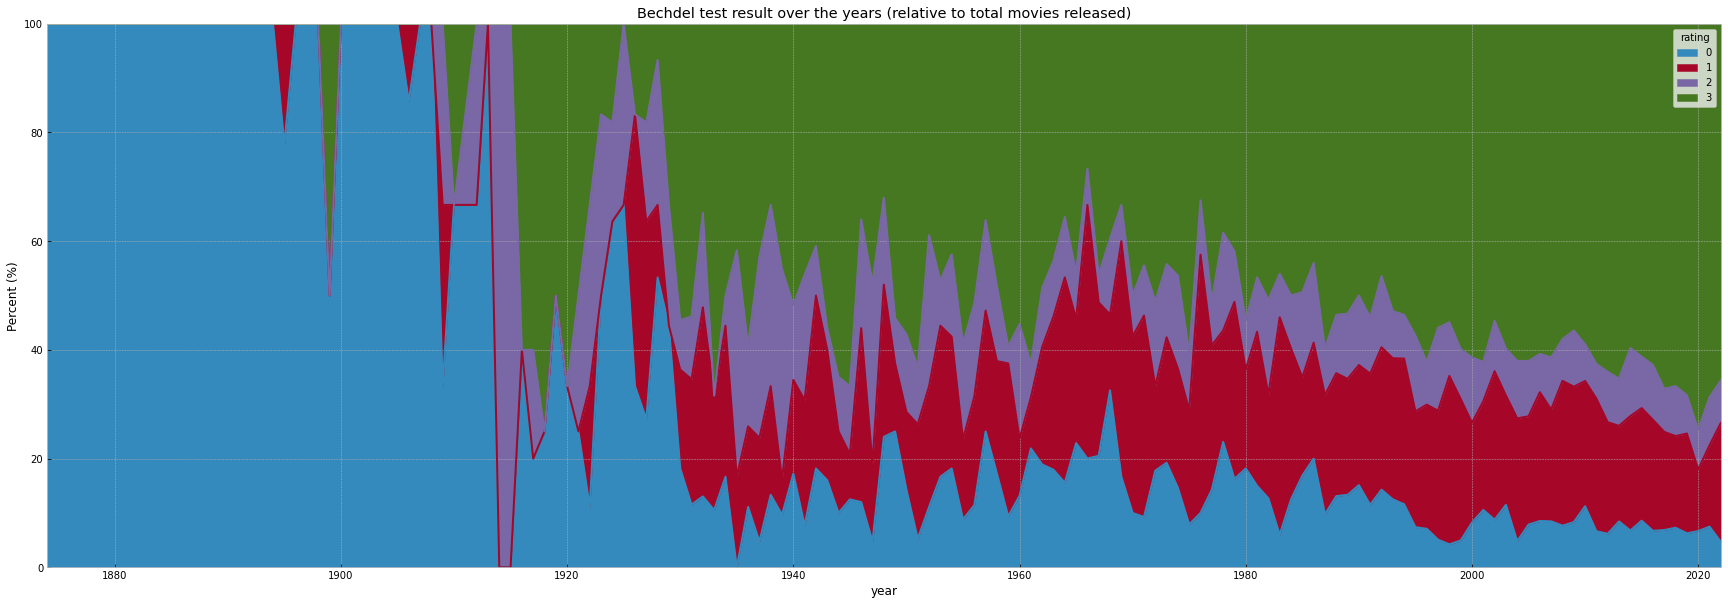

Over the years, out of all movies released in the year, more movies pass the bechdel test


In [161]:
# 2: women representation over the decades

# transform rating to a category type
bechdel_imdb["rating"] = bechdel_imdb["rating"].astype("category")

# unstack dataframe
bechdel_imdb_over_years = bechdel_imdb.groupby(["year", "rating"])["rating"].count()
bechdel_imdb_over_years = bechdel_imdb_over_years.unstack()

# plot
stacked_data = bechdel_imdb_over_years.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind ="area", stacked=True, figsize=(30,10))

plt.ylabel('Percent (%)')
plt.autoscale(enable=True, axis='both', tight=True)
plt.title("Bechdel test result over the years (relative to total movies released)")
plt.show()

print("Over the years, out of all movies released in the year, more movies pass the bechdel test")

In [163]:
# 3: Comparing the top 250 and other movies, in terms of percentage, how many movies passed (3) /failed (0) the test?

# ALL MOVIES RECORDED
# get percentages
pFailed = round((bechdel_imdb[bechdel_imdb["rating"] == 0].shape[0]/bechdel_imdb.shape[0])*100, 2)
pPassed = round((bechdel_imdb[bechdel_imdb["rating"] == 3].shape[0]/bechdel_imdb.shape[0])*100,2)

print("Out of all movies recorded in the bechdel website, {} % of movies failed the test completely (rating 0). {} % of movies passed the test (rating 3).".format(pFailed, pPassed))
allGroupedRatings = bechdel_imdb.groupby("rating")["title"].count().to_frame()
allGroupedRatings["%"] = round(allGroupedRatings["title"] * 100 / allGroupedRatings.sum()[0],2)
print(allGroupedRatings[(allGroupedRatings.index == 0) | (allGroupedRatings.index == 3)])


# TOP 250 IMDB
# get percentages
pTopFailed = round((bechdel_imdb_top[bechdel_imdb_top["rating"] == 0].shape[0]/bechdel_imdb_top.shape[0])*100, 2)
pTopPassed = round((bechdel_imdb_top[bechdel_imdb_top["rating"] == 3].shape[0]/bechdel_imdb_top.shape[0])*100,2)

print("\n"+"For the top 250 imdb movies that were also recorded on the bechdel website (241 movies), {} % of movies failed the test completely (raiting 0). {} % of movies passed the test (rating 3).".format(pTopFailed, pTopPassed))
topGroupedRatings = bechdel_imdb_top.groupby("rating")["title"].count().to_frame()
topGroupedRatings["%"] = round(topGroupedRatings["title"] * 100 / topGroupedRatings.sum()[0],2)
print(topGroupedRatings[(topGroupedRatings.index == 0) | (topGroupedRatings.index == 3)])

Out of all movies recorded in the bechdel website, 11.14 % of movies failed the test completely (rating 0). 57.0 % of movies passed the test (rating 3).
        title      %
rating              
0        1073  11.14
3        5489  57.00

For the top 250 imdb movies that were also recorded on the bechdel website (241 movies), 20.33 % of movies failed the test completely (raiting 0). 38.59 % of movies passed the test (rating 3).
        title      %
rating              
0          49  20.33
3          93  38.59
